# Time series decomposition of the data cube

In [1]:
using CABLAB

In [2]:
c             = Cube("/Net/Groups/BGI/scratch/DataCube/v0.2.0/low-res/")
vars          = ["net_ecosystem_exchange"];
cdata         = getCubeData(c,latitude=(30,65), longitude=(-10,40),variable=vars); 

We want to decompose the time series into a signals of Trend, Seasonal cycle, low-frequency variations and high-frequency variantions. Here we use a Fourier-based approach by calling **filterTSFFT**. Before doing so, we need to do some gapFilling

In [3]:
cube_filled=mapCube(gapFillMSC,cdata);

In [4]:
xout=mapCube(filterTSFFT,cube_filled)

Temporary Data Cube with the following dimensions
Time                Axis with 506 Elements from 2001-01-01T00:00:00 to 2011-12-27T00:00:00
TimeScale           Axis with elements: Trend Long-Term Variability Annual Cycle Fast Oscillations 
Lon                 Axis with 200 Elements from -10.0 to 39.75
Lat                 Axis with 140 Elements from 65.0 to 30.25
Variable            Axis with elements: net_ecosystem_exchange 


And we can plot the resulting decomposed time series

In [5]:
plotXY(xout,xaxis=TimeAxis,group="timescale",lon=35,lat=50.5,var=1)

  likely near In[5]:1
  likely near In[5]:1
  likely near In[5]:1
  likely near In[5]:1


In [6]:
variance=reduceCube(var, xout, TimeAxis, no_ocean=true);

Let's look at a map of the variability in the Trend signal to see where trends in net ecosystem exchange are strongest.

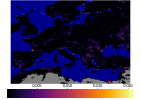

In [7]:
plotMAP(variance,timescale=1,var=1)

One can also check which areas have the strongest variance in the seasonal cycle

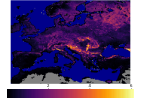

In [8]:
plotMAP(variance,timescale=3,var=1)